# Perceptron

We train a Perceptron model to solve a binary classification problem.

We consider the Iris data set and aim to classify flowers belonging to the Setosa species.

In [15]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


iris = load_iris()

# We only consider petal dimensions to simplify the data set
X = iris.data[:,[2,3]]

# We are only interested in classifying Setosa instances (wich are linearly separable from the others)
y = (iris.target == 0).astype(int) # Iris Setosa?

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

Let's visualize the training set

/tmp/ipykernel_8437/993683547.py:12: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(


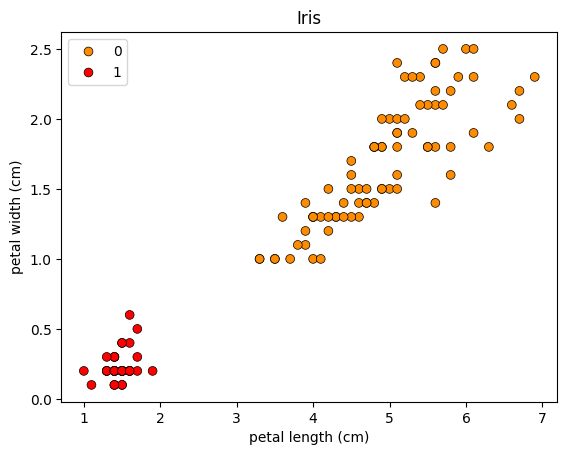

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

cmap_bold = ["darkorange", "red", "darkblue", "green", "black"]

_, ax = plt.subplots()

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

# Plot also the training points
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    palette=cmap_bold,
    hue=y_train,
    s=40,
    alpha=1.0,
    edgecolor="black",
)
plt.title(
    "Iris"
)

plt.show()


In [17]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron()
per_clf.fit(X_train, y_train)

print(f"Weights: {per_clf.coef_}")
print(f"Bias: {per_clf.intercept_}")

acc = accuracy_score(per_clf.predict(X_train), y_train)
print(f"Training Set Accuracy: {100*acc:.2f} %")
acc = accuracy_score(per_clf.predict(X_test), y_test)
print(f"Test Set Accuracy: {100*acc:.2f} %")


Weights: [[-1.6 -1.5]]
Bias: [4.]
Training Set Accuracy: 100.00 %
Test Set Accuracy: 100.00 %


Visualize the decision boundary:

/tmp/ipykernel_8437/541804403.py:18: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.scatterplot(


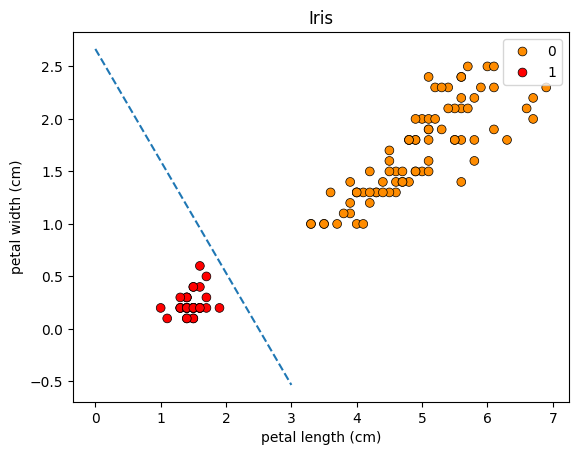

In [18]:
# line segment
w = per_clf.coef_[0]
b = per_clf.intercept_[0]

myX = np.linspace(0, 3)
myY = -(b + w[0]*myX)/w[1]


_, ax = plt.subplots()

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

# plotting the decision boundary
plt.plot(myX, myY, '--')

# Plot also the training points
sns.scatterplot(
    x=X_train[:, 0],
    y=X_train[:, 1],
    palette=cmap_bold,
    hue=y_train,
    s=40,
    alpha=1.0,
    edgecolor="black",
)
plt.title(
    "Iris"
)

plt.show()

## Exercises

1. Re-run the notebook trying to classify Iris flowers belonging to the second species (i.e., `y = (iris.target == 1).astype(int)`)

    

1. Implement the Perceptron yourself, without using scikit-learn.